# Step 1: Setup and Data Preparation 1.1Load the Dataset:

In [73]:
import pandas as pd

# Load the dataset
file_path = 'Amazon Sale Report - Amazon Sale Report.csv'
df = pd.read_csv(file_path)


# Inspect the Data:

In [74]:
print(df.head())
print(df.info())
print(df.describe())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

# Check for Null Values

In [75]:
print(df[['Amount', 'Order ID']].isnull().sum())


Amount      0
Order ID    0
dtype: int64


# Resampling and Aggregating Data

In [76]:
import pandas as pd

# Assuming df is already defined and loaded with the data
# Print the column names to verify 'Date' column
print(df.columns)

# Convert 'Date' to datetime, specifying the format explicitly
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y', errors='coerce')

    # Drop rows where 'Date' could not be converted
    df.dropna(subset=['Date'], inplace=True)

    # Set 'Date' as the index
    df.set_index('Date', inplace=True)

    # Resample to get monthly sales data
    monthly_sales = df.resample('M').agg({'Amount': 'sum', 'Order ID': 'count'})
    monthly_sales['average_order_value'] = monthly_sales['Amount'] / monthly_sales['Order ID']

    # Print the monthly sales data
    print(monthly_sales)

    # Additional analysis
    # Total amount by category
    total_amount_by_category = df.groupby('Category')['Amount'].sum()
    print(total_amount_by_category)

    # Total amount by ship city
    total_amount_by_city = df.groupby('ship-city')['Amount'].sum()
    print(total_amount_by_city)

    # Total amount by ship state
    total_amount_by_state = df.groupby('ship-state')['Amount'].sum()
    print(total_amount_by_state)

    # Total number of orders by status
    orders_by_status = df['Status'].value_counts()
    print(orders_by_status)

    # Total amount by fulfilment type
    total_amount_by_fulfilment = df.groupby('Fulfilment')['Amount'].sum()
    print(total_amount_by_fulfilment)

    # Average order value by sales channel
    average_order_value_by_channel = df.groupby('Sales Channel').apply(lambda x: x['Amount'].sum() / x['Order ID'].count())
    print(average_order_value_by_channel)

else:
    print("The 'Date' column is not present in the DataFrame.")


Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')
                  Amount  Order ID  average_order_value
Date                                                   
2022-03-31  1.075209e+05       171           628.777240
2022-04-30  1.872585e+07     30114           621.832035
2022-05-31  1.585672e+07     23512           674.409797
2022-06-30  1.331030e+07     20070           663.193588
Category
Blazzer     7.071219e+06
Perfume     4.762467e+05
Shirt       1.326143e+07
Shoes       7.591305e+04
Socks       1.207110e+05
T-shirt     2.339122e+07
Trousers    3.309342e+06
Wallet      2.933923e+05
Watch       9.150000e+02
Name: Amount, dtype: float64
ship-city
(Via Cuncolim)Quepem,South Goa                        1163.00
,HYDERABAD    

# Plotting Sales Trends

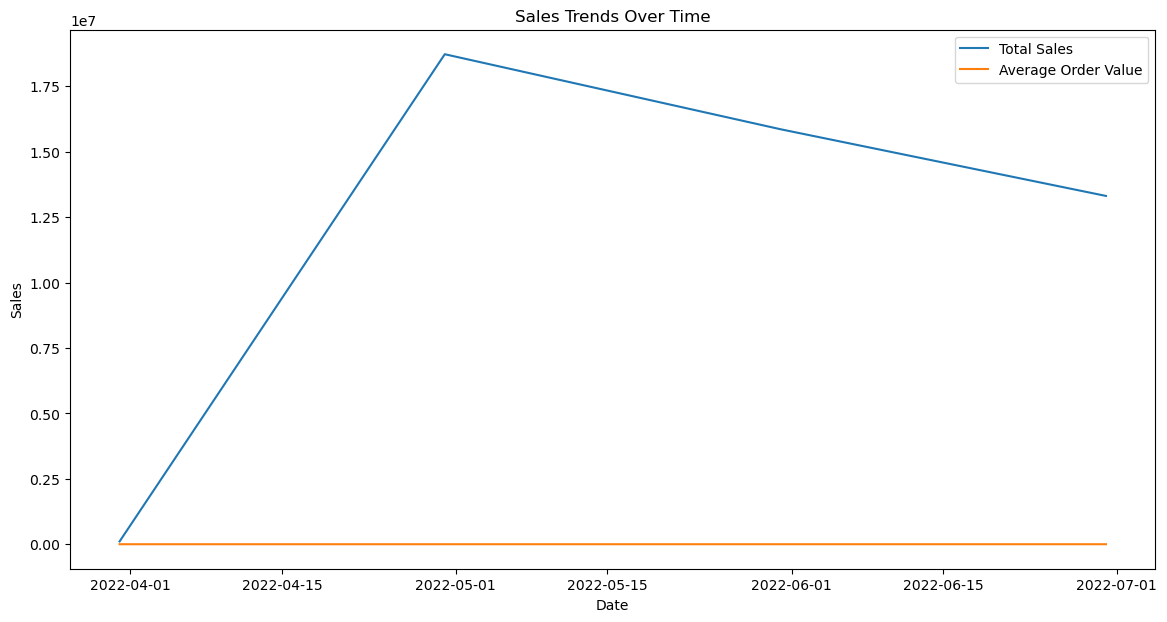

In [77]:
# Plot sales trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales.index, monthly_sales['Amount'], label='Total Sales')
plt.plot(monthly_sales.index, monthly_sales['average_order_value'], label='Average Order Value')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trends Over Time')
plt.legend()
plt.show()

# Product and Fulfillment Analysis

In [78]:
# Product Analysis
product_analysis = df.groupby('Category').agg({'Amount': 'sum', 'Order ID': 'count'}).sort_values(by='Amount', ascending=False)
print(product_analysis)

# Fulfillment Analysis
fulfillment_analysis = df.groupby('Fulfilment').agg({'Amount': 'sum', 'Order ID': 'count'}).sort_values(by='Amount', ascending=False)
print(fulfillment_analysis)

                Amount  Order ID
Category                        
T-shirt   2.339122e+07     28421
Shirt     1.326143e+07     28183
Blazzer   7.071219e+06      9371
Trousers  3.309342e+06      6250
Perfume   4.762467e+05       653
Wallet    2.933923e+05       572
Socks     1.207110e+05       316
Shoes     7.591305e+04        98
Watch     9.150000e+02         3
                  Amount  Order ID
Fulfilment                        
Amazon      3.237573e+07     49503
Merchant    1.562466e+07     24364


# customer Segmentation and Geographical Analysis

                                            Amount  Order ID
ship-city            ship-state                             
BENGALURU            KARNATAKA         4084674.392      6349
HYDERABAD            TELANGANA         3057275.184      4725
MUMBAI               MAHARASHTRA       2205927.758      3481
NEW DELHI            DELHI             2171687.632      3245
CHENNAI              TAMIL NADU        1867110.086      3063
...                                            ...       ...
CHHOTAUDEPUR         Gujarat                 0.000         1
CHAKIA               UTTAR PRADESH           0.000         1
Sahibabad, Ghaziabad UTTAR PRADESH           0.000         1
DHARMSHALA           HIMACHAL PRADESH        0.000         1
Haringhata           WEST BENGAL             0.000         1

[6615 rows x 2 columns]
                             Amount  Order ID
ship-state                                   
MAHARASHTRA             8021628.522     12649
KARNATAKA               6326419.270      986

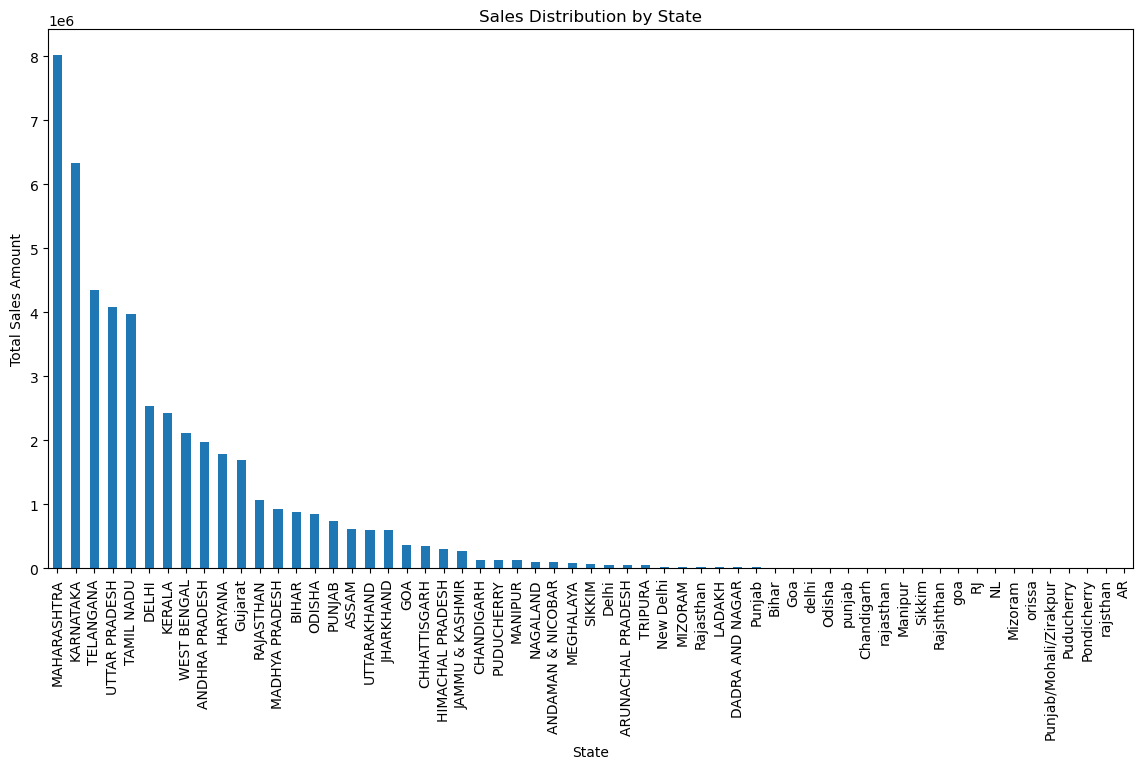

In [79]:
# Customer Segmentation
customer_segmentation = df.groupby(['ship-city', 'ship-state']).agg({'Amount': 'sum', 'Order ID': 'count'}).sort_values(by='Amount', ascending=False)
print(customer_segmentation)

# Geographical Analysis
state_sales = df.groupby('ship-state').agg({'Amount': 'sum', 'Order ID': 'count'}).sort_values(by='Amount', ascending=False)
print(state_sales)

# Plot geographical distribution
plt.figure(figsize=(14, 7))
state_sales['Amount'].plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Total Sales Amount')
plt.title('Sales Distribution by State')
plt.show()

# Seasonal Trend Analysis

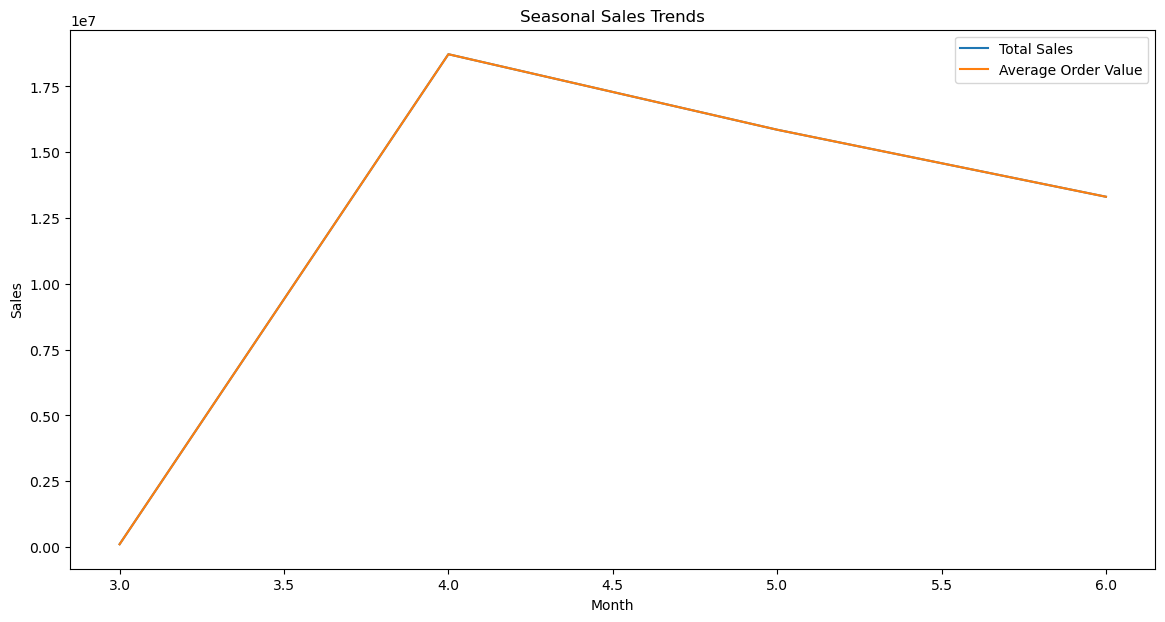

In [80]:
monthly_sales['Month'] = monthly_sales.index.month
seasonal_trend = monthly_sales.groupby('Month').agg({'Amount': 'sum', 'Order ID': 'count'})
seasonal_trend['average_order_value'] = seasonal_trend['Amount'] / seasonal_trend['Order ID']

plt.figure(figsize=(14, 7))
plt.plot(seasonal_trend.index, seasonal_trend['Amount'], label='Total Sales')
plt.plot(seasonal_trend.index, seasonal_trend['average_order_value'], label='Average Order Value')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Seasonal Sales Trends')
plt.legend()
plt.show()

# Shipment Service Level Analysis

In [81]:
shipment_analysis = df.groupby('ship-service-level').agg({'Amount': 'sum', 'Order ID': 'count'}).sort_values(by='Amount', ascending=False)
print(shipment_analysis)

                          Amount  Order ID
ship-service-level                        
Expedited           3.228910e+07     48888
Standard            1.571129e+07     24979


# Size Popularity Analysis

           Amount  Order ID
Size                       
M     8461320.066     12908
L     7835769.746     12232
XL    7652655.950     12107
XXL   6397295.578     10216
S     6293637.934      9438
3XL   5389626.906      8348
XS    4368431.776      6451
Free   846467.056      1326
6XL    337022.402       375
5XL    219924.208       248
4XL    198237.630       218


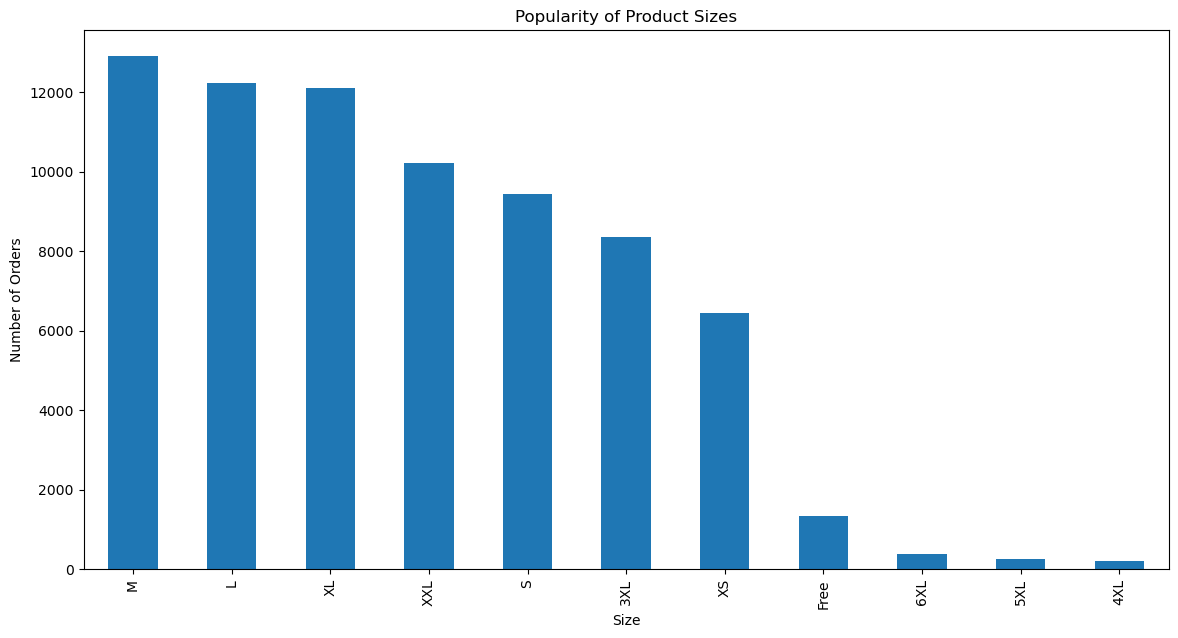

In [82]:
size_analysis = df.groupby('Size').agg({'Amount': 'sum', 'Order ID': 'count'}).sort_values(by='Amount', ascending=False)
print(size_analysis)

plt.figure(figsize=(14, 7))
size_analysis['Order ID'].plot(kind='bar')
plt.xlabel('Size')
plt.ylabel('Number of Orders')
plt.title('Popularity of Product Sizes')
plt.show()

# B2B vs. B2C Sales Analysis

             Amount  Order ID
B2B                          
False  4.761304e+07     73319
True   3.873497e+05       548


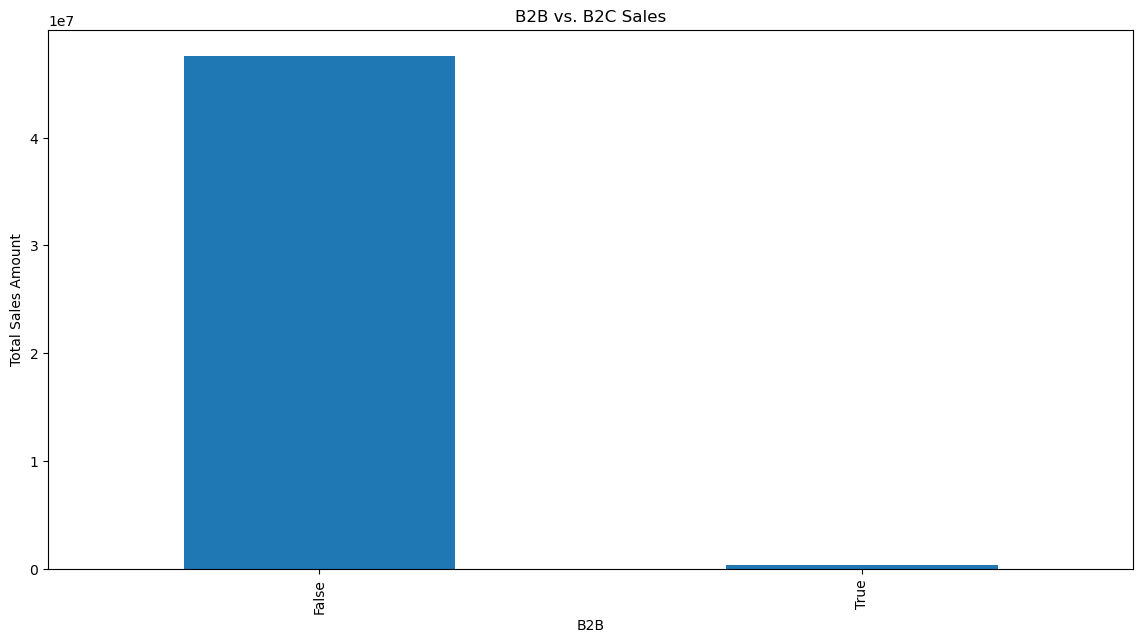

In [83]:
b2b_b2c_analysis = df.groupby('B2B').agg({'Amount': 'sum', 'Order ID': 'count'}).sort_values(by='Amount', ascending=False)
print(b2b_b2c_analysis)

plt.figure(figsize=(14, 7))
b2b_b2c_analysis['Amount'].plot(kind='bar')
plt.xlabel('B2B')
plt.ylabel('Total Sales Amount')
plt.title('B2B vs. B2C Sales')
plt.show()

# Cancellation Analysis

               Amount  Order ID
Category                       
T-shirt   3075169.638      4089
Shirt     2188330.296      4105
Blazzer    936901.390      1310
Trousers   428348.156       749
Perfume     52084.162        76
Wallet      39437.034        69
Socks       21648.408        46
Shoes        9644.050        13


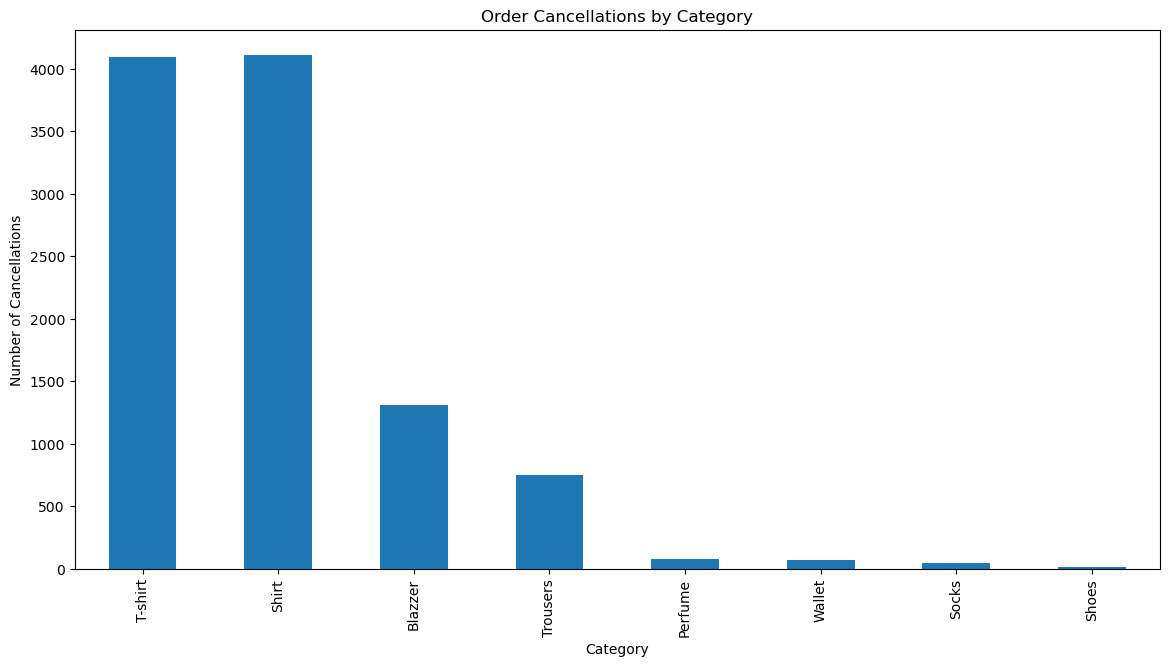

In [84]:
cancellation_analysis = df[df['Status'] == 'Cancelled'].groupby('Category').agg({'Amount': 'sum', 'Order ID': 'count'}).sort_values(by='Amount', ascending=False)
print(cancellation_analysis)

plt.figure(figsize=(14, 7))
cancellation_analysis['Order ID'].plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Number of Cancellations')
plt.title('Order Cancellations by Category')
plt.show()


# Revenue Contribution by Product Category

                Amount  RevenueContribution
Category                                   
T-shirt   2.339122e+07            48.731314
Shirt     1.326143e+07            27.627756
Blazzer   7.071219e+06            14.731586
Trousers  3.309342e+06             6.894407
Perfume   4.762467e+05             0.992173
Wallet    2.933923e+05             0.611229
Socks     1.207110e+05             0.251479
Shoes     7.591305e+04             0.158151
Watch     9.150000e+02             0.001906


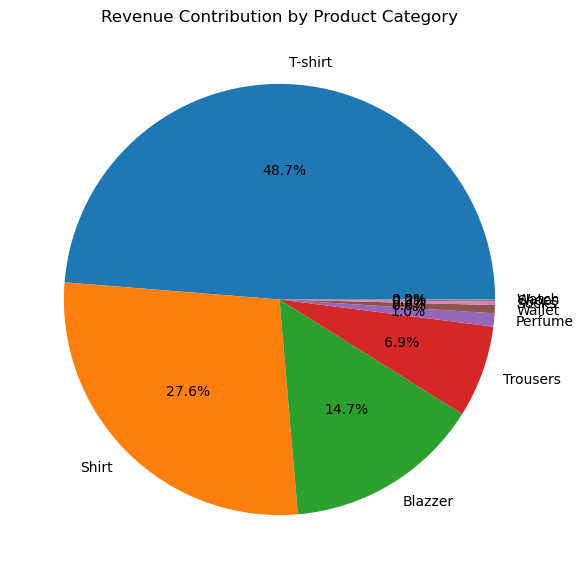

In [85]:
# Calculate Revenue Contribution by Product Category
category_revenue_contribution = df.groupby('Category').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False)
category_revenue_contribution['RevenueContribution'] = (category_revenue_contribution['Amount'] / category_revenue_contribution['Amount'].sum()) * 100
print(category_revenue_contribution)

plt.figure(figsize=(14, 7))
category_revenue_contribution['RevenueContribution'].plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title('Revenue Contribution by Product Category')
plt.show()


# Sales Channel Performance Analysis

                     Amount  Order ID
Sales Channel                        
Amazon.in      4.795110e+07     73791
Non-Amazon     4.929071e+04        76


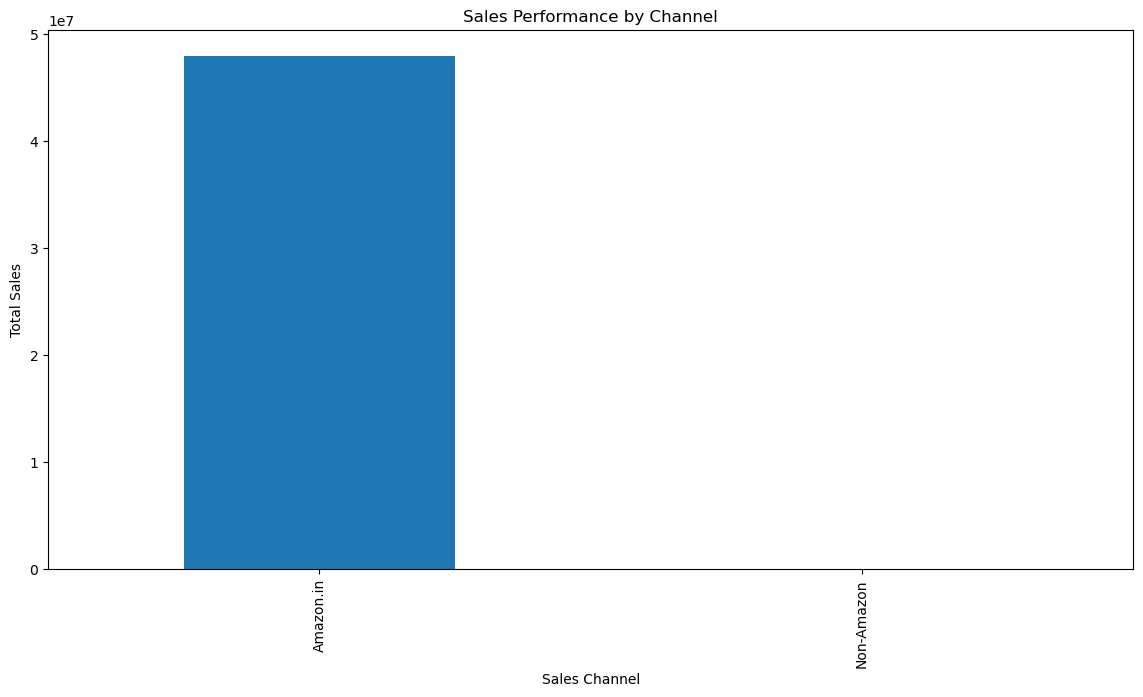

In [86]:
# Analyze Sales Channel Performance
sales_channel_performance = df.groupby('Sales Channel').agg({'Amount': 'sum', 'Order ID': 'count'}).sort_values(by='Amount', ascending=False)
print(sales_channel_performance)

plt.figure(figsize=(14, 7))
sales_channel_performance['Amount'].plot(kind='bar')
plt.xlabel('Sales Channel')
plt.ylabel('Total Sales')
plt.title('Sales Performance by Channel')
plt.show()


# Average Order Value (AOV) Analysis

Average Order Value (AOV): 649.82


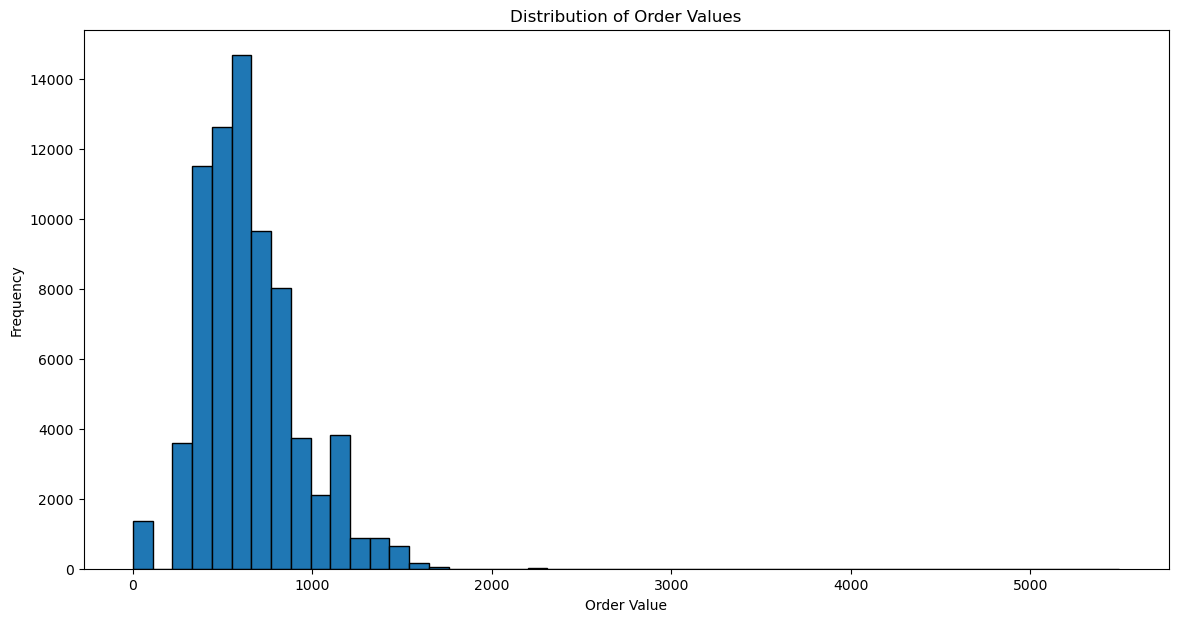

In [87]:
# Calculate Average Order Value (AOV)
aov = df['Amount'].mean()
print(f"Average Order Value (AOV): {aov:.2f}")

# Plot Distribution of Order Values
plt.figure(figsize=(14, 7))
df['Amount'].plot(kind='hist', bins=50, edgecolor='black')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.title('Distribution of Order Values')
plt.show()


# Recommendations

In [88]:
total_sales = monthly_sales['Amount'].sum()
average_monthly_sales = monthly_sales['Amount'].mean()

top_selling_products = product_analysis.head(3)
top_fulfillment_methods = fulfillment_analysis.head(2)
top_shipment_methods = shipment_analysis.head(2)

top_cities = customer_segmentation.head(5)
top_states = state_sales.head(5)

top_sizes = size_analysis.head(3)

b2b_vs_b2c = b2b_b2c_analysis
most_cancelled_categories = cancellation_analysis.head(3)

recommendations = f"""
Recommendations and Insights:

1. Sales Performance:
   - Total sales amount: {total_sales:.2f} INR
   - Average monthly sales amount: {average_monthly_sales:.2f} INR

2. Top Selling Products:
   {top_selling_products.to_string()}

3. Preferred Fulfillment Methods:
   {top_fulfillment_methods.to_string()}

4. Top Shipment Service Levels:
   {top_shipment_methods.to_string()}

5. Top Customer Locations:
   - Top cities: {top_cities.index.tolist()}
   - Top states: {top_states.index.tolist()}

6. Popular Product Sizes:
   {top_sizes.to_string()}

7. B2B vs. B2C Sales:
   {b2b_vs_b2c.to_string()}

8. Order Cancellations:
   {most_cancelled_categories.to_string()}

9. Seasonal Trends:
   - Sales tend to peak in certain months, indicating seasonal buying patterns. Plan promotions accordingly.

10. Recommendations:
   a. Focus marketing efforts on the top selling product categories to boost sales.
   b. Ensure optimal inventory levels for top-selling items to prevent stockouts.
   c. Leverage the preferred fulfillment methods to maintain customer satisfaction and delivery efficiency.
   d. Tailor promotions and discounts for customers in top cities and states to maximize regional sales.
   e. Consider expanding the product range in categories with growing sales trends.
   f. Improve logistics and distribution networks in high-demand areas to enhance delivery speed and reliability.
   g. Pay special attention to the popular sizes and ensure sufficient stock.
   h. Analyze reasons for order cancellations and address issues to reduce cancellation rates.
   i. Explore opportunities to increase B2B sales by targeting businesses with bulk order discounts.
"""

print(recommendations)


Recommendations and Insights:

1. Sales Performance:
   - Total sales amount: 48000389.25 INR
   - Average monthly sales amount: 12000097.31 INR

2. Top Selling Products:
                   Amount  Order ID
Category                        
T-shirt   2.339122e+07     28421
Shirt     1.326143e+07     28183
Blazzer   7.071219e+06      9371

3. Preferred Fulfillment Methods:
                     Amount  Order ID
Fulfilment                        
Amazon      3.237573e+07     49503
Merchant    1.562466e+07     24364

4. Top Shipment Service Levels:
                             Amount  Order ID
ship-service-level                        
Expedited           3.228910e+07     48888
Standard            1.571129e+07     24979

5. Top Customer Locations:
   - Top cities: [('BENGALURU', 'KARNATAKA'), ('HYDERABAD', 'TELANGANA'), ('MUMBAI', 'MAHARASHTRA'), ('NEW DELHI', 'DELHI'), ('CHENNAI', 'TAMIL NADU')]
   - Top states: ['MAHARASHTRA', 'KARNATAKA', 'TELANGANA', 'UTTAR PRADESH', 'TAMIL NADU']

6. 